# E_07 human_segmentation  
  
----  
  
목차  
1. 사진 블러처리  
2. 강아지사진 블러처리
3. 배경 바꾸기

In [4]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(1000, 750, 3)


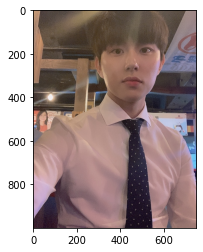

In [5]:
img_path = 'C:/DB/image/me/png_image.png'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
model_dir = 'C:/DB/image/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model= semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [7]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [8]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

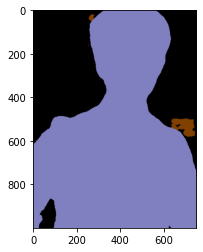

In [9]:
plt.imshow(output)
plt.show()

In [10]:
segvalues

{'class_ids': array([ 0, 15, 20], dtype=int64),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [11]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person
tv


In [12]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [13]:
colormap[15]

array([192, 128, 128])

In [14]:
seg_color = (128,128,192)

(1000, 750)


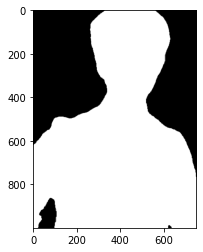

In [15]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

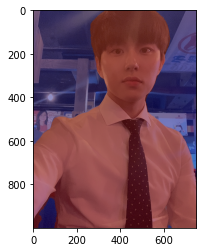

In [16]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

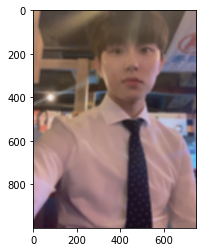

In [17]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

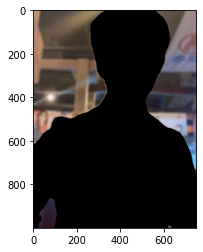

In [18]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

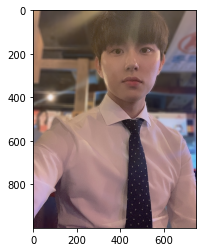

In [19]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
cv2.imwrite('C:/DB/image/blur.png',img_concat)

True

(1024, 1024, 3)


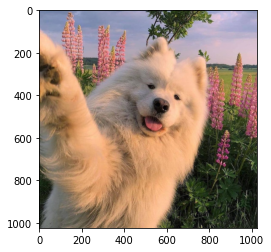

In [21]:
img_path = 'C:/DB/image/dog_images.png'  
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
model_dir = 'C:/DB/image/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model= semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [23]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [24]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
print('이미지 라벨 수:',len(LABEL_NAMES))

이미지 라벨 수: 21


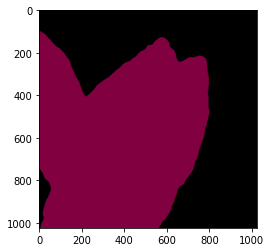

In [25]:
plt.imshow(output)
plt.show()

In [26]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [27]:
colormap = np.zeros((256,3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind>> channel) & 1) << shift
    ind >>=3
    
print(colormap[class_id])
print(colormap[:20])

[ 64   0 128]
[[  0   0   0]
 [128   0   0]
 [  0 128   0]
 [128 128   0]
 [  0   0 128]
 [128   0 128]
 [  0 128 128]
 [128 128 128]
 [ 64   0   0]
 [192   0   0]
 [ 64 128   0]
 [192 128   0]
 [ 64   0 128]
 [192   0 128]
 [ 64 128 128]
 [192 128 128]
 [  0  64   0]
 [128  64   0]
 [  0 192   0]
 [128 192   0]]


In [28]:
seg_color=(128,0,64)

(1024, 1024)


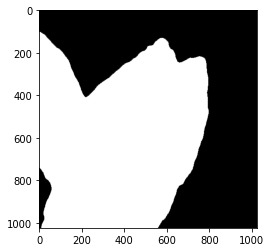

In [29]:
seg_map=np.all(output==seg_color,axis=-1)
print(seg_map.shape)
plt.imshow(seg_map,cmap='gray')
plt.show()

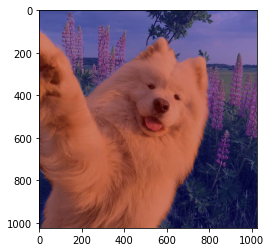

In [30]:
img_show=img_orig.copy()
img_mask = seg_map.astype(np.uint8)*255
color_mask=cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show=cv2.addWeighted(img_show,0.6,color_mask,0.4,0.0)

plt.imshow(cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB))
plt.show()

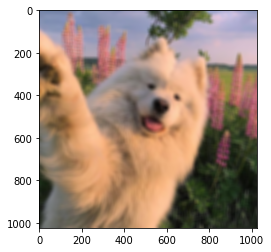

In [31]:
img_orig_blur = cv2.blur(img_orig, (20,20))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

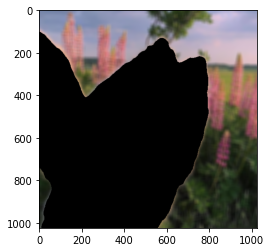

In [32]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

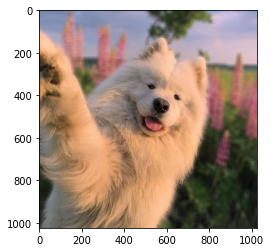

In [33]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
cv2.imwrite('C:/DB/image/blur_dog.png',img_concat)

True

(1280, 1280, 3)


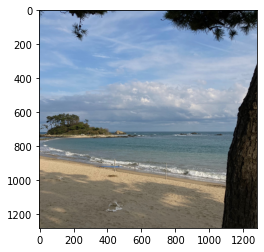

In [59]:
background_path = 'C:/DB/image/sea.jpg'  
background_orig = cv2.imread(background_path)

print(background_orig.shape)
plt.imshow(cv2.cvtColor(background_orig, cv2.COLOR_BGR2RGB))
plt.show()

(900, 900, 3)


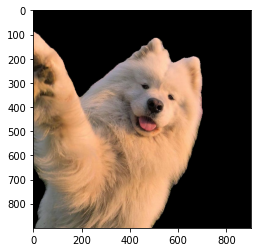

In [60]:
dog = np.where(img_mask_color==255, img_orig, 0)
dog = cv2.resize(dog, dsize=(900, 900), interpolation=cv2.INTER_CUBIC)
print(dog.shape)
plt.imshow(cv2.cvtColor(dog, cv2.COLOR_BGR2RGB))
plt.show()

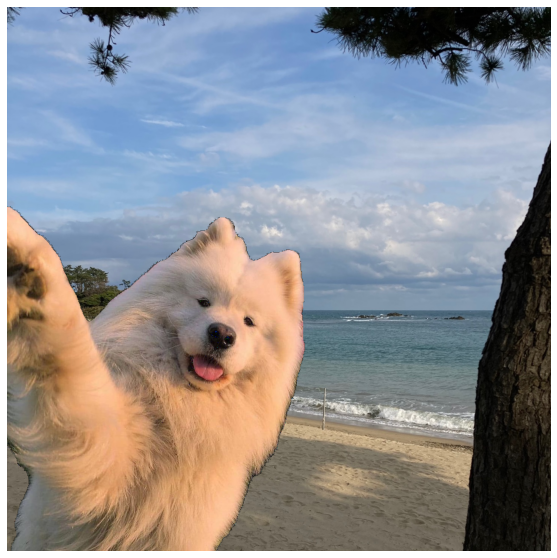

In [61]:
refined_y = 380
refined_x = 0

sticker_area = background_orig[refined_y:refined_y+dog.shape[0], refined_x:refined_x+dog.shape[1]]
background_orig[refined_y:refined_y+dog.shape[0], refined_x:refined_x+dog.shape[1]] = np.where(dog==0,sticker_area,dog).astype(np.uint8)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(background_orig, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [62]:
cv2.imwrite('C:/DB/image/my_meet_background.png',img_concat)

True

### 회고  
  
----  
  
처음 블러처리 이미지를 만들때에는 사용하는 함수들의 기능에 대해 제대로 이해하지 못하였으나,  
여러번 다른 미션들을 수행하다보니 함수에 대해 자세히 보게 되었고 의미를 조금씩 이해할 수 있었다.  
고양이보단 개가 좋아서 고양이가 아닌 개를 선택해 세그먼트하였다. (감점 사유가 되진 않길 바란다.)  
배경이미지를 합치는 과정을 생각하다보니 익스4에서 배웠던 스티커 붙이기처럼 해도 되지 않을까 라는 생각이 들어서  
우수노드들을 살펴보니 스티커붙이기 형식으로 이미지를 합치신 유현지님의 방식을 참고하여 완성하였다.  
더 다양한 구글미트 배경화면을 만들 수 있게 되어 흡족하다.  
참고] https://github.com/hyyoo3526/AIFFEL_EXPLORATION/blob/main/EXPLORATION_08/EXPLORATION_IC1_08_human_segmentation%20.ipynb

  
나는 용서가 가능했지만, 루브릭에서 요청한 문제점도 첨부한다.  
![poster](./check_point.png)